In [1]:
import pandas as pd
import geopandas as gpd
import math

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# Crear un mapa sobre la base de una capa Open Street Map
mapa = folium.Map(location=[22.27228,-97.83623], tiles='openstreetmap', zoom_start=10)

# Mostrar el mapa
mapa

In [3]:
mapa = pd.read_csv("../input/tampicomaderocsv/tweets_tampico_madero_2.csv")

In [4]:
mapa.dropna(subset=['lat', 'lon'], inplace=True)

In [5]:
# Crear un mapa
m_2 = folium.Map(location=[22.27228,-97.83623], zoom_start=13)

# Agregar puntos al mapa, soon los robos diurnos
tooltip = "Click me!"
for idx, row in mapa.iterrows():
    Marker([row['lat'], row['lon']],popup="Tweet Locaclizado", tooltip=tooltip).add_to(m_2)

# Mostrar el mapa
m_2

In [6]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

from nltk.book import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
mapa['puntuacion']= mapa['tweet'].apply(lambda text:sia.polarity_scores(text)) 
mapa.head()

,Unnamed: 0,timestamp,user,tweet,lat,lon,lang_langid,lang_langdetect,lang_textblob,puntuacion
0,7,2020-07-22 16:56:03-05:00,@OSCARLSAUCEDOH,Sigan 👉 gaboniprofessional #video NUEVO en #yo...,22.264406,-97.78519,eo,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,74,2020-07-22 17:47:55-05:00,@ElliePerezMejia,💚 en Tampico https://t.co/POlVhi1zAQ,22.255300,-97.86860,si,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,91,2020-07-22 18:12:28-05:00,@OSCARLSAUCEDOH,Por el bien de #mexico🇲🇽 soy #antiamlo4tmorena...,22.279510,-97.88662,an,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,99,2020-07-22 18:18:16-05:00,@RedPhoto_V,#love #volleyball #beautiful #fashion #tbt #a7...,22.264650,-97.78603,en,en,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,147,2020-07-22 19:31:08-05:00,@VIZENZIO,Acaba de publicar una foto en Tampico https://...,22.255300,-97.86860,es,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [9]:
mapa['compound']= mapa['puntuacion'].apply(lambda score_dict:score_dict['compound'])
mapa.head()

,Unnamed: 0,timestamp,user,tweet,lat,lon,lang_langid,lang_langdetect,lang_textblob,puntuacion,compound
0,7,2020-07-22 16:56:03-05:00,@OSCARLSAUCEDOH,Sigan 👉 gaboniprofessional #video NUEVO en #yo...,22.264406,-97.78519,eo,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,74,2020-07-22 17:47:55-05:00,@ElliePerezMejia,💚 en Tampico https://t.co/POlVhi1zAQ,22.255300,-97.86860,si,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,91,2020-07-22 18:12:28-05:00,@OSCARLSAUCEDOH,Por el bien de #mexico🇲🇽 soy #antiamlo4tmorena...,22.279510,-97.88662,an,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,99,2020-07-22 18:18:16-05:00,@RedPhoto_V,#love #volleyball #beautiful #fashion #tbt #a7...,22.264650,-97.78603,en,en,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,147,2020-07-22 19:31:08-05:00,@VIZENZIO,Acaba de publicar una foto en Tampico https://...,22.255300,-97.86860,es,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [10]:
mapa['comp_score']= mapa['compound'].apply(lambda c: 'positivo' if c>=0 else 'negativo')
mapa.head()

,Unnamed: 0,timestamp,user,tweet,lat,lon,lang_langid,lang_langdetect,lang_textblob,puntuacion,compound,comp_score
0,7,2020-07-22 16:56:03-05:00,@OSCARLSAUCEDOH,Sigan 👉 gaboniprofessional #video NUEVO en #yo...,22.264406,-97.78519,eo,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
1,74,2020-07-22 17:47:55-05:00,@ElliePerezMejia,💚 en Tampico https://t.co/POlVhi1zAQ,22.255300,-97.86860,si,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
2,91,2020-07-22 18:12:28-05:00,@OSCARLSAUCEDOH,Por el bien de #mexico🇲🇽 soy #antiamlo4tmorena...,22.279510,-97.88662,an,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
3,99,2020-07-22 18:18:16-05:00,@RedPhoto_V,#love #volleyball #beautiful #fashion #tbt #a7...,22.264650,-97.78603,en,en,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
4,147,2020-07-22 19:31:08-05:00,@VIZENZIO,Acaba de publicar una foto en Tampico https://...,22.255300,-97.86860,es,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo


In [11]:
mapa['tweet']= mapa['tweet'].str.replace('\d+','')
mapa['tweet']= mapa['tweet'].apply (lambda x:" ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
mapa['tweet']= mapa['tweet'].apply (lambda x:" ".join(x for x in x.split() if x not in stop))
mapa.head()
#stop

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,timestamp,user,tweet,lat,lon,lang_langid,lang_langdetect,lang_textblob,puntuacion,compound,comp_score
0,7,2020-07-22 16:56:03-05:00,@OSCARLSAUCEDOH,sigan 👉 gaboniprofessional #video nuevo en #yo...,22.264406,-97.78519,eo,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
1,74,2020-07-22 17:47:55-05:00,@ElliePerezMejia,💚 en tampico https://t.co/polvhizaq,22.255300,-97.86860,si,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
2,91,2020-07-22 18:12:28-05:00,@OSCARLSAUCEDOH,por el bien de #mexico🇲🇽 soy #antiamlotmorena ...,22.279510,-97.88662,an,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
3,99,2020-07-22 18:18:16-05:00,@RedPhoto_V,#love #volleyball #beautiful #fashion #tbt #ai...,22.264650,-97.78603,en,en,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo
4,147,2020-07-22 19:31:08-05:00,@VIZENZIO,acaba de publicar una foto en tampico https://...,22.255300,-97.86860,es,es,es,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,positivo


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

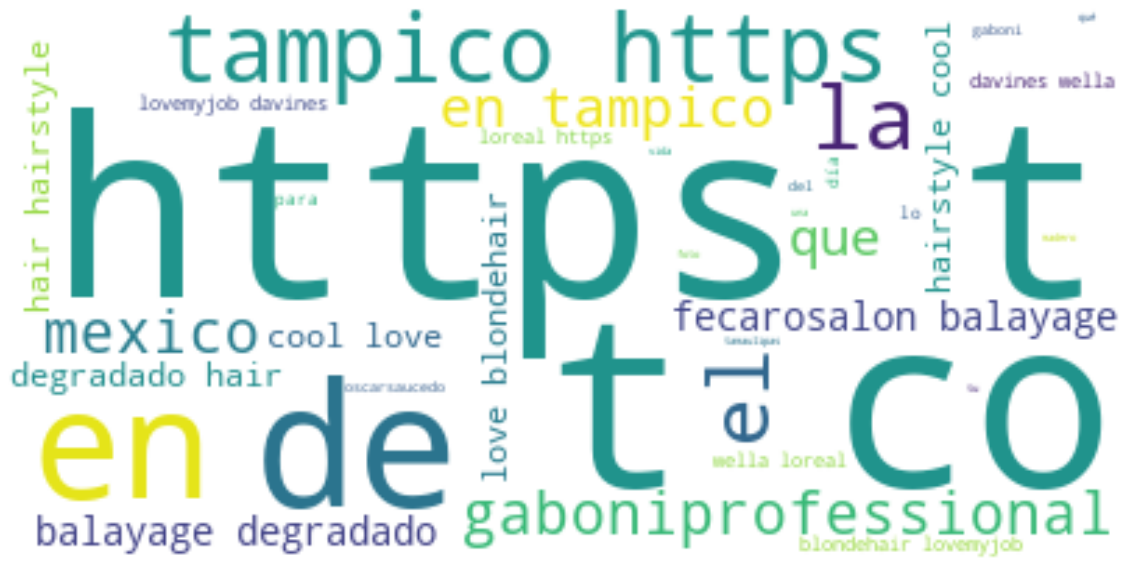

In [12]:
rewies_str = mapa['tweet'].str.cat()
wordcloud = WordCloud (background_color = 'white'). generate(rewies_str)
plt.figure (figsize= (20,20))
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis("off")
plt.imshow

In [13]:
# Crear el mapa
m_3 = folium.Map(location=[22.27228,-97.83623], zoom_start=13)

# Agregar marcadores 
mc = MarkerCluster()
for idx, row in mapa.iterrows():
    if not math.isnan(row['lon']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['lon']]))
m_3.add_child(mc)

# Mosttrar el mapa
m_3

In [14]:
pip install sentiment_analysis_spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 19.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import sentiment_analysis_spanish
from sentiment_analysis_spanish import sentiment_analysis
sas = sentiment_analysis.SentimentAnalysisSpanish()

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [16]:
mapa['puntuacion']=mapa['tweet'].apply(lambda tweet:sas.sentiment(tweet))
mapa

,Unnamed: 0,timestamp,user,tweet,lat,lon,lang_langid,lang_langdetect,lang_textblob,puntuacion,compound,comp_score
0,7,2020-07-22 16:56:03-05:00,@OSCARLSAUCEDOH,sigan 👉 gaboniprofessional #video nuevo en #yo...,22.264406,-97.785190,eo,es,es,0.832323,0.0000,positivo
1,74,2020-07-22 17:47:55-05:00,@ElliePerezMejia,💚 en tampico https://t.co/polvhizaq,22.255300,-97.868600,si,es,es,0.487280,0.0000,positivo
2,91,2020-07-22 18:12:28-05:00,@OSCARLSAUCEDOH,por el bien de #mexico🇲🇽 soy #antiamlotmorena ...,22.279510,-97.886620,an,es,es,0.116046,0.0000,positivo
3,99,2020-07-22 18:18:16-05:00,@RedPhoto_V,#love #volleyball #beautiful #fashion #tbt #ai...,22.264650,-97.786030,en,en,en,0.497892,0.0000,positivo
4,147,2020-07-22 19:31:08-05:00,@VIZENZIO,acaba de publicar una foto en tampico https://...,22.255300,-97.868600,es,es,es,0.128402,0.0000,positivo
5,179,2020-07-23 13:03:37-05:00,@drraulbarragan,en valoración preparatoria exploramos detalle ...,22.268698,-97.859190,es,es,es,0.779180,0.0000,positivo
6,317,2020-07-23 16:47:26-05:00,@LicDelasalud,asesoría nutricional lente🤓 evaluación corpora...,22.260176,-97.850970,es,es,es,0.032623,0.0000,positivo
7,344,2020-07-23 17:05:03-05:00,@heidysusi,🙌💆🙇masaje antiestrés ven cambia tu día en minu...,22.262945,-97.874344,an,es,es,0.031011,0.0000,positivo
8,348,2020-07-23 17:09:37-05:00,@JuLyaguiLeeRa,snack box $ servicio domicilio❤️🍱🎉 en never ja...,22.273281,-97.853510,eo,es,es,0.451292,0.0000,positivo
9,366,2020-07-23 17:19:45-05:00,@Chefangelgarcia,negrilla!! (here go again🥃🥃🥃) @ el porvenir re...,22.233760,-97.867220,eo,en,es,0.300027,0.0000,positivo


In [17]:
mapa['puntuacion']=mapa['puntuacion'].apply(lambda c:'positivo'if c>=0.5 else 'negativo')
mapa

,Unnamed: 0,timestamp,user,tweet,lat,lon,lang_langid,lang_langdetect,lang_textblob,puntuacion,compound,comp_score
0,7,2020-07-22 16:56:03-05:00,@OSCARLSAUCEDOH,sigan 👉 gaboniprofessional #video nuevo en #yo...,22.264406,-97.785190,eo,es,es,positivo,0.0000,positivo
1,74,2020-07-22 17:47:55-05:00,@ElliePerezMejia,💚 en tampico https://t.co/polvhizaq,22.255300,-97.868600,si,es,es,negativo,0.0000,positivo
2,91,2020-07-22 18:12:28-05:00,@OSCARLSAUCEDOH,por el bien de #mexico🇲🇽 soy #antiamlotmorena ...,22.279510,-97.886620,an,es,es,negativo,0.0000,positivo
3,99,2020-07-22 18:18:16-05:00,@RedPhoto_V,#love #volleyball #beautiful #fashion #tbt #ai...,22.264650,-97.786030,en,en,en,negativo,0.0000,positivo
4,147,2020-07-22 19:31:08-05:00,@VIZENZIO,acaba de publicar una foto en tampico https://...,22.255300,-97.868600,es,es,es,negativo,0.0000,positivo
5,179,2020-07-23 13:03:37-05:00,@drraulbarragan,en valoración preparatoria exploramos detalle ...,22.268698,-97.859190,es,es,es,positivo,0.0000,positivo
6,317,2020-07-23 16:47:26-05:00,@LicDelasalud,asesoría nutricional lente🤓 evaluación corpora...,22.260176,-97.850970,es,es,es,negativo,0.0000,positivo
7,344,2020-07-23 17:05:03-05:00,@heidysusi,🙌💆🙇masaje antiestrés ven cambia tu día en minu...,22.262945,-97.874344,an,es,es,negativo,0.0000,positivo
8,348,2020-07-23 17:09:37-05:00,@JuLyaguiLeeRa,snack box $ servicio domicilio❤️🍱🎉 en never ja...,22.273281,-97.853510,eo,es,es,negativo,0.0000,positivo
9,366,2020-07-23 17:19:45-05:00,@Chefangelgarcia,negrilla!! (here go again🥃🥃🥃) @ el porvenir re...,22.233760,-97.867220,eo,en,es,negativo,0.0000,positivo


In [18]:
# Crear un mapa
m_4 = folium.Map(location=[22.27228,-97.83623], zoom_start=13)

def color_producer(val):
    if val == 'negativo':
        return 'darkred'
    else:
        return 'forestgreen'

# Agregar las burbujas
for i in range(0,len(mapa)):
    Circle(
        location=[mapa.iloc[i]['lat'], mapa.iloc[i]['lon']],
        radius=20,
        color=color_producer(mapa.iloc[i]['puntuacion'])).add_to(m_4)

# Mostrar el mapa
m_4

In [19]:
# Crea un mapa base
m_5 = folium.Map(location=[22.27228,-97.83623], zoom_start=12)

# Agrega datos heatmap al mapa base
HeatMap(data=mapa[['lat', 'lon']], radius=50).add_to(m_5)

# Muestra el mapa
m_5